# Step by Step walkthrough of producing a reflectance model with `PyHapke`

In [2]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import frostie.hapke as hapke
import frostie.utils as utils
mpl.rcParams['figure.dpi'] = 100
import os

### 1. Single component model

We will plot a water ice reflectance spectrum in this tutorial. 

First, let us set up our planetary regolith using the class `regolith`

In [7]:
reload(hapke)

<module 'frostie.hapke' from '/Users/imishra/My Drive/Work/Research_core/Code/FROSTIE/frostie/hapke.py'>

In [16]:
example_one_regolith = hapke.regolith()

The `example_one_regolith` object is currently empty, but we can add more information about what the regolith is made of and how we are observing it.

First, let us define what our regolith is made of. In this example, we only have one component: water. We will need to load the optical constants of water as they are the key input for reflectance modelling. Optical constants of water measured at 120 K, in the near infrared, are available in the Github repository of `FROSTIE`. We will focus on the 1-2.5 $\mu$m wavelength region.

We will use the `load_default_op_cons` function, which will upload optical constants for water ice at 120 K (Mastrapa et al. (2009)) included in the `FROSTIE` package for demonstration purposes.

In [3]:
wav_water, n_water, k_water = utils.load_water_op_cons()

Let's plot these optical constants to get some insight into water ice's optical behavior. 

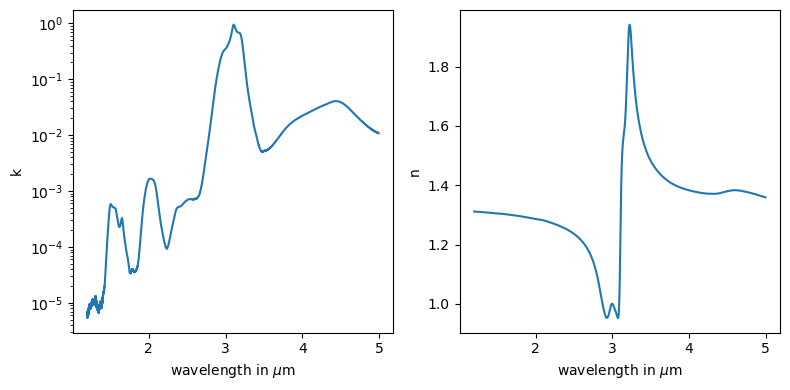

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].plot(wav_water,k_water)
ax[0].set_ylabel('k')
ax[0].set_xlabel('wavelength in $\mu$m')
ax[0].set_yscale('log')
ax[1].plot(wav_water,n_water)
ax[1].set_ylabel('n')
ax[1].set_xlabel('wavelength in $\mu$m')
plt.tight_layout();

In the $k$ spectrum, there are two significant bumps near 1.5 and 2.0 $\mu$m. Since the absorption coefficient $\alpha$ is directly dependent on $k$ ($\alpha = 4\pi k/\lambda$), we expect to see strong water absorption features in the reflectance spectrum around 1.5 and 2.0 $\mu$m as well

We will create a dictionary to hold all information about water that our model needs, including the optical constants, grain size $D$, phase function $P$ and density of internal scatterers $s$. For phase function, `PyHapke` provides four options, `isotropic`, `Euler`, `HG1` (one parameter Henyey-Greenstein) and `HG2`. We will use `HG2` in this example, since its the most versatile. We will set grain size $D = 100$ microns.

In [17]:
water = {'name':'h2o', 'n':n_water, 'k':k_water, 'wav':wav_water, 'D':100, 'p_type':'HG2'}

example_one_regolith.add_components([water])


Next, let us set-up the observation by providing the observation geometry angles, $i$, $e$ and $g$, in degrees. 

In [18]:
example_one_regolith.obs_geometry(i=45,e=45,g=90)

Next, let us define the porosity of the regolith. Porosity is defined as the fraction of volume in a regolith that is empty, which in case of airless bodies is vacuum. Hapke model permits a range of [0.48, 1) for porosity of the regolith. If porosity gets smaller than $\sim 0.48$, the grains in the regolith get close enough that diffraction effects start to matter, which the Hapke model currently does not incorporate.

In [19]:
example_one_regolith.porosity(p=0.9)

We will assume no backscattering enhancement for now, so let's set the $B$ parameter to 0

In [20]:
example_one_regolith.backscattering(B=0)

We will assume the density of internal scatterers $s$ to be 0.

In [21]:
example_one_regolith.s(s=0)

We are ready to model the reflectance of our regolith `example_one_regolith`

In [22]:
example_one_regolith.calculate_reflectance()

Let us plot this reflectance spectrum

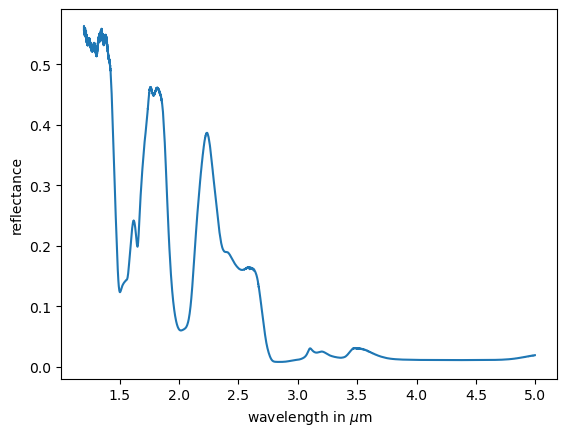

In [24]:
plt.figure()
plt.plot(example_one_regolith.wav_model, example_one_regolith.model)
plt.ylabel('reflectance')
plt.xlabel('wavelength in $\mu$m');

Great! The reflectance spectrum looks good, with prominent absorption features near 1.5 and 2.0 microns as we expected from observing $k$ earlier